In [1]:
# Copyright (C) 2024 Richard Stiskalek
# This program is free software; you can redistribute it and/or modify it
# under the terms of the GNU General Public License as published by the
# Free Software Foundation; either version 3 of the License, or (at your
# option) any later version.
#
# This program is distributed in the hope that it will be useful, but
# WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General
# Public License for more details.
#
# You should have received a copy of the GNU General Public License along
# with this program; if not, write to the Free Software Foundation, Inc.,
# 51 Franklin Street, Fifth Floor, Boston, MA  02110-1301, USA.
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
from joblib import dump
from h5py import File

import csiborgtools

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [5]:
fpath = "/mnt/extraspace/rstiskalek/catalogs/PV_compilation.hdf5"

with File(fpath, 'r') as f:
    RA_2MTF = f["2MTF/RA"][...]
    DEC_2MTF = f["2MTF/DEC"][...]

In [36]:
!rm /mnt/extraspace/rstiskalek/csiborg_postprocessing/flow_mock/*


reader = csiborgtools.read.Carrick2015Field()
velocity = reader.velocity_field()
boxsize = csiborgtools.simname2boxsize("Carrick2015")

mean_mag = 10.31
std_mag = 0.83

kmax = 1
seed = 53

for k in trange(kmax):
    mock, truths = csiborgtools.flow.mock_Carrick2MTF(
        velocity, boxsize, RA_2MTF, DEC_2MTF,
        mean_mag=mean_mag, std_mag=std_mag,
        seed=seed, verbose=True)
    seed += 1

    fname = f"/mnt/extraspace/rstiskalek/csiborg_postprocessing/flow_mock/Carrick2MTFmock_seed{k}.hdf5"  # noqa
    print("Saving to ", fname)
    with File(fname, 'w') as f:
        for key in mock.keys():
            f.create_dataset(key, data=mock[key])

    fname_truths = fname.replace(".hdf5", "_truths.pkl")
    dump(truths, fname_truths)

Saving to  /mnt/extraspace/rstiskalek/csiborg_postprocessing/flow_mock/Carrick2MTFmock_seed0.hdf5


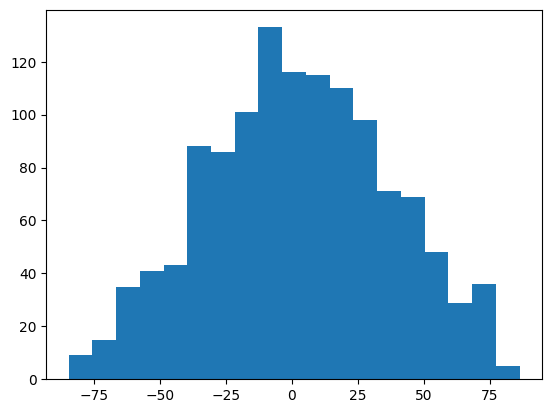

In [31]:
plt.figure()
plt.hist(mock["DEC"], bins="auto")
plt.show()